In [1]:
import pandas as pd
import numpy as np
from modules.data_samples import get_data
from modules.data_cleaning import data_cleaning_reviews
from modules.utility_functions import create_wordcloud
from modules.data_cleaning import data_cleaning_books
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

[nltk_data] Downloading package stopwords to /Users/hugo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hugo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Get data sample

In [2]:
df_books_sample,df_book_authors,df_book_reviews, df_book_genres  = get_data()

### Save samples to CSV for better handling

In [ ]:

df_books_sample.to_csv('../data/sample_data/books_sample.csv', index=False)
df_book_authors.to_csv('../data/sample_data/authors_sample.csv', index=False)
df_book_reviews.to_csv('../data/sample_data/reviews_sample.csv', index=False)
df_book_genres.to_csv('../data/sample_data/genres_sample.csv', index=False)

### Get data sample for processing

In [2]:
df_books_sample   = pd.read_csv('../data/sample_data/books_sample.csv')

In [80]:
df_authors_sample = pd.read_csv('../data/sample_data/authors_sample.csv')

In [81]:
df_reviews_sample = pd.read_csv('../data/sample_data/reviews_sample.csv')

In [82]:
df_genres_sample = pd.read_csv('../data/sample_data/genres_sample.csv')

#### Data exploration and cleaning

In [83]:
df_books_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23382 entries, 0 to 23381
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  23382 non-null  int64  
 1   country_code        23382 non-null  object 
 2   language_code       13379 non-null  object 
 3   average_rating      23382 non-null  float64
 4   description         23382 non-null  object 
 5   num_pages           23382 non-null  int64  
 6   publication_year    23382 non-null  int64  
 7   image_url           23382 non-null  object 
 8   book_id             23382 non-null  int64  
 9   ratings_count       23382 non-null  int64  
 10  title               23382 non-null  object 
 11  author              23382 non-null  int64  
 12  name                23382 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


In [3]:
#Remove unnecesary columns
df_books_sample.drop(columns=['language_code','country_code'], inplace= True)
df_books_sample.shape


(23382, 11)

In [4]:
df_books_sample.isnull().sum()

text_reviews_count    0
average_rating        0
description           0
num_pages             0
publication_year      0
image_url             0
book_id               0
ratings_count         0
title                 0
author                0
name                  0
dtype: int64

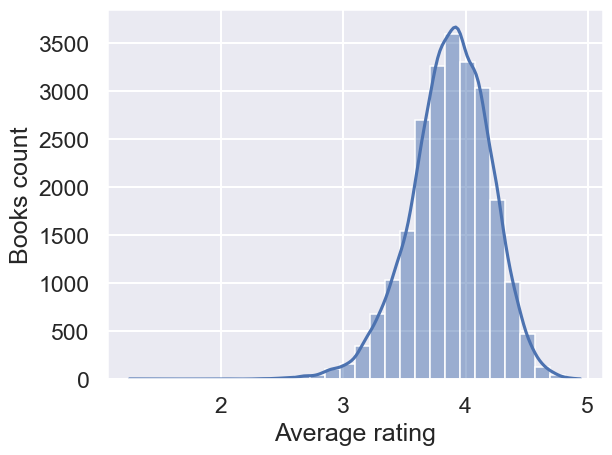

In [5]:
#Review books raiting
ax = sns.histplot(df_books_sample["average_rating"].astype(float),
            bins= 30,
            kde= True)
ax.set(xlabel='Average rating', ylabel='Books count')
plt.show()

In [13]:
#df_books_sample["text_reviews_count"].value_counts().head(60).plot(kind='barh', figsize=(10,15))
#sns.countplot(y="text_reviews_count", data=df_books_sample)

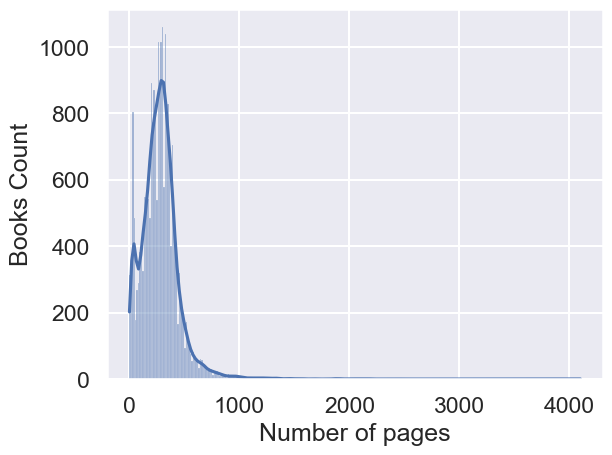

In [6]:
#Review pages distribution
ax = sns.histplot(df_books_sample["num_pages"].astype(float),
            #bins= 30,
            kde= True)
ax.set(xlabel='Number of pages', ylabel='Books Count')
plt.show()

In [7]:
#Check if books have values with 0
df_books_sample.isin([0]).sum(axis=0)

text_reviews_count     0
average_rating         0
description            0
num_pages             72
publication_year       0
image_url              0
book_id                0
ratings_count          0
title                  0
author                 0
name                   0
dtype: int64

In [8]:
#Replace pages with value 0 with the median
pages_median = df_books_sample['num_pages'].replace(0,pd.NA).median()

In [9]:
df_books_sample["num_pages"] = df_books_sample["num_pages"].replace(0,pages_median)

In [10]:
df_books_sample.isin([0]).sum(axis=0)

text_reviews_count    0
average_rating        0
description           0
num_pages             0
publication_year      0
image_url             0
book_id               0
ratings_count         0
title                 0
author                0
name                  0
dtype: int64

In [14]:
df_books_sample = data_cleaning_books(df_books_sample)

In [15]:
df_books_sample.head()

,text_reviews_count,average_rating,description,num_pages,publication_year,image_url,book_id,ratings_count,title,author,name,description_text_clean
0,12,4.05,#1 New York Timesbestselling author Johanna Li...,400,2015,https://images.gr-assets.com/books/1424053649m...,22609476,62,Stormy Persuasion,29542,Johanna Lindsey,"[New, York, Timesbestselling, author, Johanna,..."
1,182,3.85,Trading orgasms for information isn't their us...,194,2008,https://s.gr-assets.com/assets/nophoto/book/11...,3681619,3718,Dangerous Boys and Their Toy,20983,Shayla Black,"[Trading, orgasm, information, n't, usual, way..."
2,19,3.95,New York Times bestselling author Nora Roberts...,448,2009,https://images.gr-assets.com/books/1320551817m...,6316751,208,Public Secrets,625,Nora Roberts,"[New, York, Times, bestselling, author, Nora, ..."
3,17,3.64,The perfect gift book for cat lovers everywher...,128,2005,https://images.gr-assets.com/books/1327412414m...,2296183,97,Test Your Cat: The Cat IQ Test,1033341,E.M. Bard,"[perfect, gift, book, cat, lover, everywhere, ..."
4,103,3.62,It starts with the dogs. They won't stop barki...,944,2000,https://images.gr-assets.com/books/1299392082m...,271167,1332,The Rift,48960,Walter Jon Williams,"[start, dog, wo, n't, stop, barking, earth, sh..."


In [95]:
df_authors_sample.isnull().sum()

author_id    0
name         0
dtype: int64

In [96]:
authors_group = df_books_sample.groupby('name', as_index=False)['book_id'].count().sort_values(by='book_id', ascending=False).head(10)


In [97]:
authors_group

,name,book_id
14450,Stephen King,63
6419,James Patterson,40
194,Agatha Christie,36
15960,William Shakespeare,35
4897,Francine Pascal,32
6135,J.K. Rowling,30
6519,Jane Austen,27
12477,R.L. Stine,27
11731,Nora Roberts,27
11513,Neil Gaiman,24


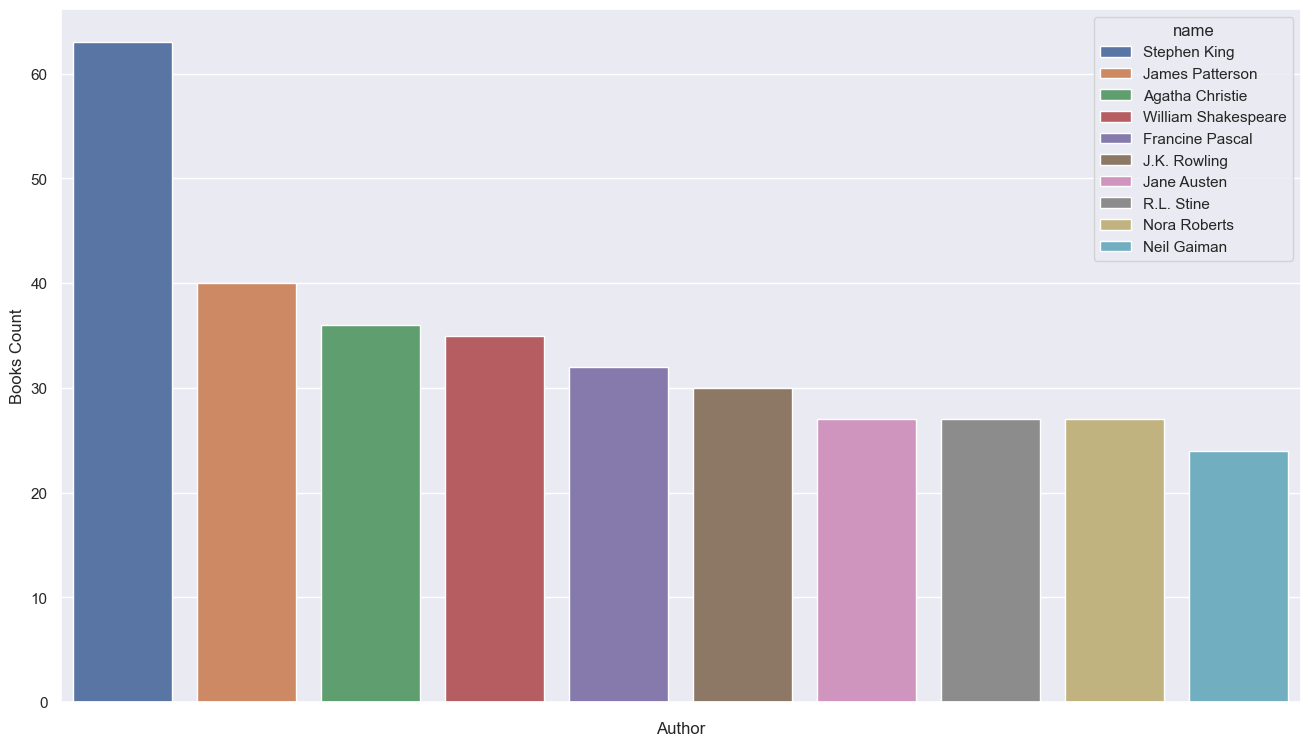

In [126]:
#Top 10 authors in the dataset sample
ax = sns.set(rc={'figure.figsize':(16,9)})


sns.barplot(data= authors_group, x='name', y='book_id', hue='name', dodge=False).set(xticklabels=[],xlabel='Author', ylabel='Books Count');
#ax.set(xlabel='Author', ylabel='Books Count')
plt.show()

In [99]:
df_reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504091 entries, 0 to 504090
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       504091 non-null  object
 1   book_id       504091 non-null  int64 
 2   review_id     504091 non-null  object
 3   rating        504091 non-null  int64 
 4   review_text   503846 non-null  object
 5   date_added    504091 non-null  object
 6   date_updated  504091 non-null  object
 7   read_at       417705 non-null  object
 8   started_at    294306 non-null  object
 9   n_votes       504091 non-null  int64 
 10  n_comments    504091 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 42.3+ MB


In [100]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
1,8842281e1d1347389f2ab93d60773d4d,22551730,754710070f38e1c59a45f6a85473b836,4,Another hard to put down nonfiction book from ...,Thu May 07 13:59:32 -0700 2015,Wed Dec 14 12:30:43 -0800 2016,Sat Jul 11 00:00:00 -0700 2015,Wed Jun 24 00:00:00 -0700 2015,20,6
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,Mark Watney is a steely-eyed missile man. A ma...,Sat Apr 05 09:30:53 -0700 2014,Wed Mar 22 11:33:10 -0700 2017,Mon Aug 25 00:00:00 -0700 2014,Sat Aug 16 00:00:00 -0700 2014,25,5
3,8842281e1d1347389f2ab93d60773d4d,6150530,936139cec0dc251a606bd3c9eba19f92,5,A business classic that everyone should read. ...,Tue Jun 09 11:06:25 -0700 2009,Mon Jul 20 15:41:30 -0700 2009,Fri Jul 17 00:00:00 -0700 2009,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,77427,bc805ea66895a08aeda480386509bd65,4,** spoiler alert ** \n Great book - I liked it...,Wed Jun 03 18:37:13 -0700 2009,Mon Sep 14 19:10:26 -0700 2009,Mon Sep 14 00:00:00 -0700 2009,NaN,2,2


In [101]:
df_reviews_sample.shape

(504091, 11)

In [102]:
#Remove unnecesary columns
df_reviews_sample.drop(columns=['date_added','date_updated','read_at','started_at'], inplace= True)
                       #,'review_id','user_id']
df_reviews_sample.shape

(504091, 7)

In [103]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,1,0
1,8842281e1d1347389f2ab93d60773d4d,22551730,754710070f38e1c59a45f6a85473b836,4,Another hard to put down nonfiction book from ...,20,6
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,Mark Watney is a steely-eyed missile man. A ma...,25,5
3,8842281e1d1347389f2ab93d60773d4d,6150530,936139cec0dc251a606bd3c9eba19f92,5,A business classic that everyone should read. ...,5,1
4,8842281e1d1347389f2ab93d60773d4d,77427,bc805ea66895a08aeda480386509bd65,4,** spoiler alert ** \n Great book - I liked it...,2,2


In [104]:
df_reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504091 entries, 0 to 504090
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      504091 non-null  object
 1   book_id      504091 non-null  int64 
 2   review_id    504091 non-null  object
 3   rating       504091 non-null  int64 
 4   review_text  503846 non-null  object
 5   n_votes      504091 non-null  int64 
 6   n_comments   504091 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.9+ MB


In [105]:
df_reviews_sample['review_text'] = df_reviews_sample['review_text'].astype(str)

In [106]:
df_reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504091 entries, 0 to 504090
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      504091 non-null  object
 1   book_id      504091 non-null  int64 
 2   review_id    504091 non-null  object
 3   rating       504091 non-null  int64 
 4   review_text  504091 non-null  object
 5   n_votes      504091 non-null  int64 
 6   n_comments   504091 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.9+ MB


In [107]:
df_reviews_sample_p = data_cleaning_reviews(df_reviews_sample)

In [108]:
df_reviews_sample_p

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments,review_text_clean
0,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,1,0,"[Recommended, Katz, Avail, free, December, htt..."
1,8842281e1d1347389f2ab93d60773d4d,22551730,754710070f38e1c59a45f6a85473b836,4,Another hard to put down nonfiction book from ...,20,6,"[Another, hard, put, nonfiction, book, Erik, L..."
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,Mark Watney is a steely-eyed missile man. A ma...,25,5,"[Mark, Watney, steelyeyed, missile, man, man, ..."
3,8842281e1d1347389f2ab93d60773d4d,6150530,936139cec0dc251a606bd3c9eba19f92,5,A business classic that everyone should read. ...,5,1,"[business, classic, everyone, read, Explains, ..."
4,8842281e1d1347389f2ab93d60773d4d,77427,bc805ea66895a08aeda480386509bd65,4,** spoiler alert ** \n Great book - I liked it...,2,2,"[spoiler, alert, Great, book, liked, better, s..."
...,...,...,...,...,...,...,...,...
504086,f1eecdc20de2e0771c2240caf69a0e2f,31122,c3f57095191fad4dd8a26576e7827899,5,"This isn't necessarily a page turner, but I th...",0,0,"[n't, necessarily, page, turner, thoroughly, e..."
504087,48a10d546ba07520ce194dc18e687be4,12998057,d6bb1b634d1b0d9843fa233cd1e9ed39,4,This book is perfect for the long-time series ...,0,0,"[book, perfect, longtime, series, reader, wond..."
504088,385b4fb7923bdb1fffc66f7f2420b60f,4268157,d26f24af08afd0c6181e0e034067df86,5,Amazing beginning to the Perfect Chemistry ser...,0,0,"[Amazing, beginning, Perfect, Chemistry, serie..."
504089,c5ae39ab55f5031b440d93f3f09ee736,9118117,c39bc9167943ab93940120afb008cda9,5,Review of The Brotherhood--A Precinct 11 Novel...,0,0,"[Review, BrotherhoodA, Precinct, Novel, fictio..."


In [109]:
df_genres_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110989 entries, 0 to 110988
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   book_id  110989 non-null  int64 
 1   genres   110989 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [110]:
book_genres_group = df_genres_sample.groupby('genres')['genres'].count().rename_axis('genre_name').reset_index(name='count')

In [120]:
book_genres_group = book_genres_group.sort_values(by='count', ascending= False)

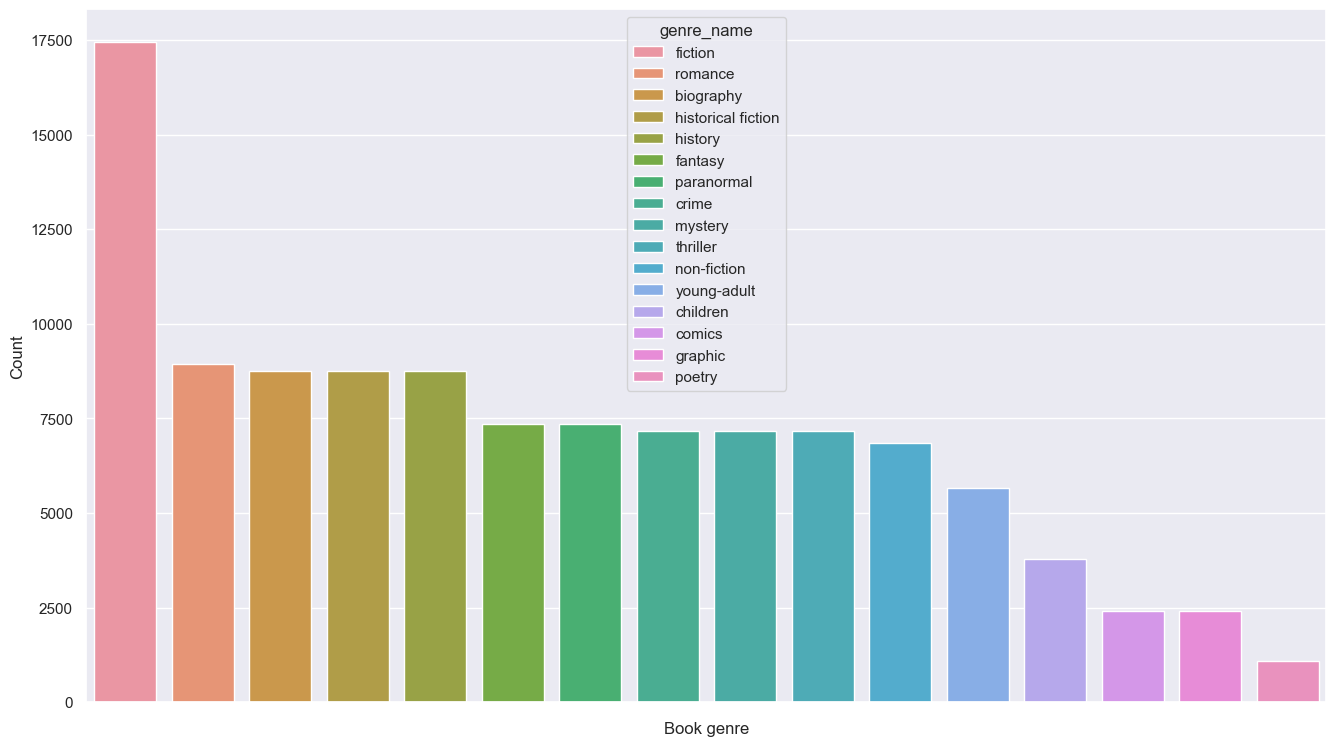

In [127]:
#Book genre and count
ax = sns.set(rc={'figure.figsize':(16,9)})
sns.barplot(data= book_genres_group, x='genre_name', y='count', hue='genre_name', dodge=False).set(xticklabels=[],xlabel='Book genre', ylabel='Count');
plt.show()

In [112]:
df_books_sample.to_csv('../data/sample_data/processed/books_sample.csv', index=False)
df_authors_sample.to_csv('../data/sample_data/processed/authors_sample.csv', index=False)
df_reviews_sample_p.to_csv('../data/sample_data/processed/reviews_sample.csv', index=False)
df_genres_sample.to_csv('../data/sample_data/processed/genres_sample.csv', index=False)